## Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

   Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for k.

    d. Repeat the clustering, this time with 3 different features.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [9]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
27,5.0,3.4,1.6,0.4,setosa,0
24,5.1,3.3,1.7,0.5,setosa,0
48,4.6,3.2,1.4,0.2,setosa,0
29,5.2,3.4,1.4,0.2,setosa,0
32,5.4,3.4,1.5,0.4,setosa,0
67,5.6,3.0,4.5,1.5,versicolor,2
36,5.0,3.2,1.2,0.2,setosa,0
70,5.6,2.5,3.9,1.1,versicolor,1
4,4.6,3.1,1.5,0.2,setosa,0
16,5.7,4.4,1.5,0.4,setosa,0


b. Visualize the results of your clustering.

In [12]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [17]:
X_scaled['cluster'] = 'cluster_' + iris.cluster.astype(str)
X_scaled.head()

,sepal_width,petal_width,cluster
1,1.019004,-1.315444,cluster_cluster_0
2,-0.131979,-1.315444,cluster_cluster_0
3,0.328414,-1.315444,cluster_cluster_0
4,0.098217,-1.315444,cluster_cluster_0
5,1.249201,-1.315444,cluster_cluster_0


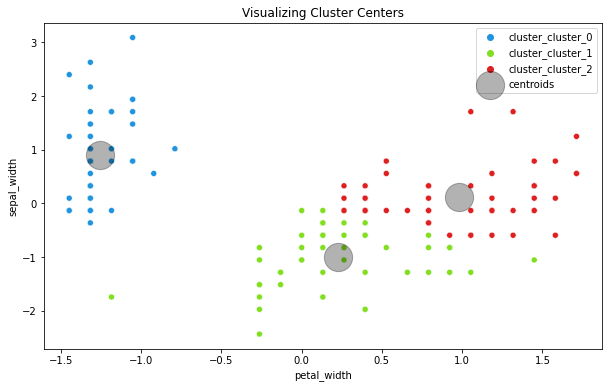

In [18]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [19]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_cluster_0


In [23]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
cluster_cluster_0,3.451020,0.244898
cluster_cluster_1,2.620000,1.374000
cluster_cluster_2,3.107843,1.945098


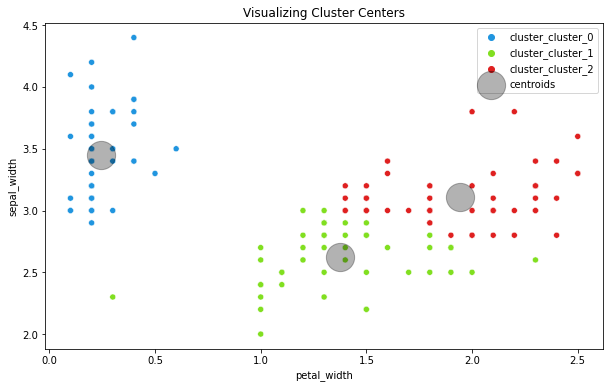

In [24]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(10, 6))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_width', y='sepal_width', data=iris, hue='cluster')
# plot cluster centers (centroids)
centroids.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), s=800, color='k', alpha=0.3, label='centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

c. Use the elbow method to visually select a good value for k.

In [28]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

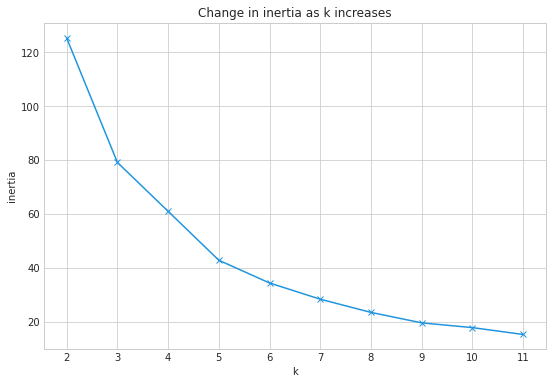

In [29]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')